In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr

In [2]:
cd C:/Project CPC152

C:\Project CPC152


In [3]:
iris = pd.read_csv("iris.csv")
iris

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

## Understanding the data

In [4]:
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
iris.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [6]:
iris.shape

(150, 6)

In [7]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

## Cleaning Data

In [8]:
# Find null values in Iris dataset
iris.apply(lambda x: sum(x.isnull()), axis = 0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Change the data type from string to numeric using Encoder

In [9]:
pd.options.mode.chained_assignment = None

In [10]:
data = iris.iloc[:,1:]

In [11]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

## Feature Importance

In [12]:
x = iris.iloc[:, 1:-1]
y = iris.iloc[:, -1]

In [109]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.10368596 0.05072105 0.39370672 0.45188627]


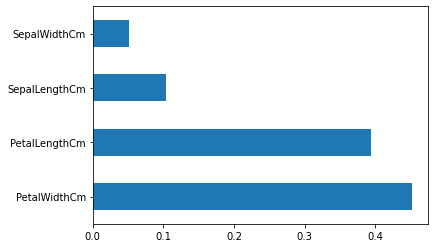

In [110]:
# Find the significant features in predicting the Iris species
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

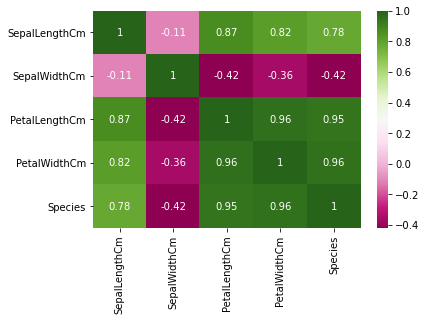

In [17]:
# Find correlation between the features
g=sns.heatmap(data.corr(),annot=True,cmap="PiYG")
plt.show()

## Spliting the Dataset

In [18]:
x = iris.iloc[:, 1:-1]
y = iris.iloc[:, -1]

In [19]:
print(x.shape)

(150, 4)


In [20]:
print(y.shape)


(150,)


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=4)

In [22]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [23]:
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


In [24]:
print(X_train1.shape)
print(X_test1.shape)

(120, 4)
(30, 4)


In [25]:
print(y_train1.shape)
print(y_test1.shape)

(120,)
(30,)


## Predictions

In [26]:
# To find the optimal K value, run the k value from 1 through 30 and applying the Elbow Method.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,31,2)
scores = {}
scores_list = []
error_rate = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    error_rate.append(np.mean(y_pred != y_test))

In [27]:
scores

{1: 0.9555555555555556,
 3: 0.9777777777777777,
 5: 0.9777777777777777,
 7: 0.9777777777777777,
 9: 0.9777777777777777,
 11: 0.9777777777777777,
 13: 0.9777777777777777,
 15: 0.9777777777777777,
 17: 0.9777777777777777,
 19: 0.9777777777777777,
 21: 0.9777777777777777,
 23: 0.9777777777777777,
 25: 0.9777777777777777,
 27: 0.9777777777777777,
 29: 0.9555555555555556}

In [28]:
# Repeat same step for (80:20) split dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,31,2)
scores1 = {}
scores_list1 = []
error_rate1 = []

for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train1,y_train1)
    y_pred1 = knn1.predict(X_test1)
    scores1[k] = metrics.accuracy_score(y_test1, y_pred1)
    scores_list1.append(metrics.accuracy_score(y_test1, y_pred1))
    error_rate1.append(np.mean(y_pred1 != y_test1))

In [29]:
scores1

{1: 0.9333333333333333,
 3: 0.9666666666666667,
 5: 0.9666666666666667,
 7: 0.9666666666666667,
 9: 0.9666666666666667,
 11: 0.9666666666666667,
 13: 0.9666666666666667,
 15: 0.9666666666666667,
 17: 0.9666666666666667,
 19: 0.9666666666666667,
 21: 0.9666666666666667,
 23: 0.9666666666666667,
 25: 0.9666666666666667,
 27: 0.9666666666666667,
 29: 0.9333333333333333}

Text(0, 0.5, 'Testing Accuracy')

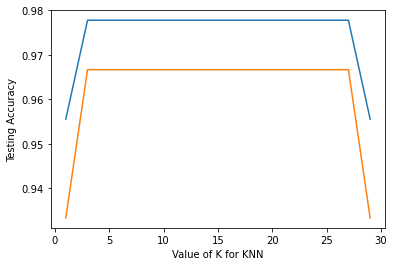

In [30]:
# Plot realationship between K Value and Testing Accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, scores_list) 
plt.plot(k_range, scores_list1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, '‘Error Rate’')

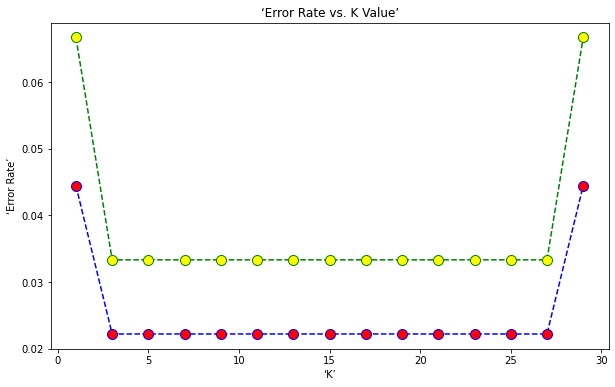

In [31]:
# Plot relationship between K Value and Error Rate
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(k_range,error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(k_range,error_rate1,color='green', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('‘Error Rate vs. K Value’')
plt.xlabel('‘K’')
plt.ylabel('‘Error Rate’')

## When K=3


In [32]:
model = KNeighborsClassifier(n_neighbors=3) 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [33]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
# Prediction result
predictions = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [35]:
# Find accuracy value and confusion matrix
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions))
print('Recall    : ', recall_score(y_test, predictions, average="weighted"))
print('Precision : ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8222222222222222
Recall    :  0.8222222222222222
Precision :  0.8296296296296297
Confusion matrix: 
[[21  0  0]
 [ 0  7  3]
 [ 0  5  9]]


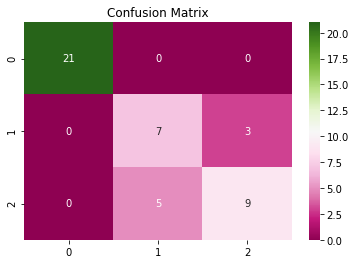

In [36]:
# Plot the confusion matrix graph
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [37]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
predictions = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [39]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions))
print('Recall    : ', recall_score(y_test, predictions, average="weighted"))
print('Precision : ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9555555555555556
Recall    :  0.9555555555555556
Precision :  0.9555555555555556
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]


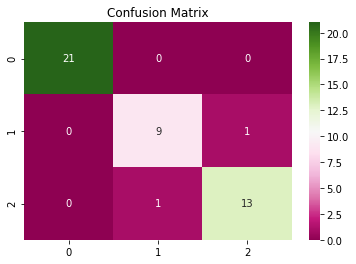

In [40]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [41]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
predictions = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [43]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions))
print('Recall    : ', recall_score(y_test, predictions, average="weighted"))
print('Precision : ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


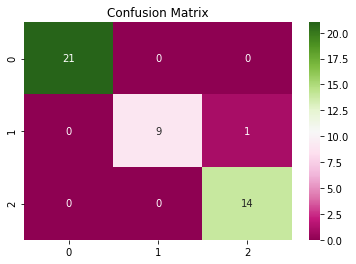

In [44]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [45]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=3)

In [46]:
predictions = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [47]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions))
print('Recall    : ', recall_score(y_test1, predictions, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8666666666666667
Recall    :  0.8666666666666667
Precision :  0.8910714285714286
Confusion matrix: 
[[15  1  0]
 [ 0  4  1]
 [ 0  2  7]]


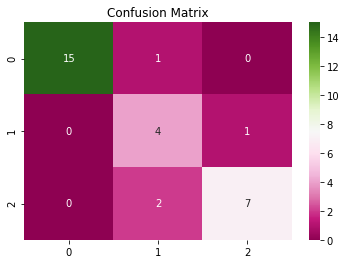

In [48]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [49]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=3)

In [50]:
predictions = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [51]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions))
print('Recall    : ', recall_score(y_test1, predictions, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9333333333333333
Recall    :  0.9333333333333333
Precision :  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


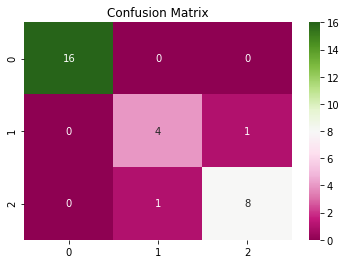

In [52]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [53]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=3)

In [54]:
predictions = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [55]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions))
print('Recall    : ', recall_score(y_test1, predictions, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)


Accuracy  :  0.9666666666666667
Recall    :  0.9666666666666667
Precision :  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


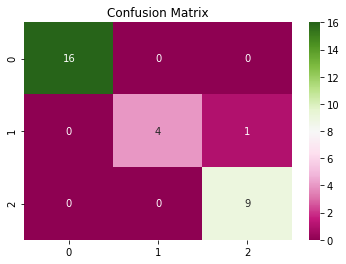

In [56]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

## When K=15


In [57]:
model = KNeighborsClassifier(n_neighbors=15) 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [58]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=15)

In [59]:
predictions1 = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [60]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions1))
print('Recall    : ', recall_score(y_test, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8666666666666667
Recall    :  0.8666666666666667
Precision :  0.874074074074074
Confusion matrix: 
[[21  0  0]
 [ 0  8  2]
 [ 0  4 10]]


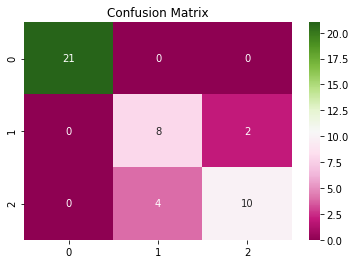

In [61]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [62]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=15)

In [63]:
predictions1 = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [64]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions1))
print('Recall    : ', recall_score(y_test, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


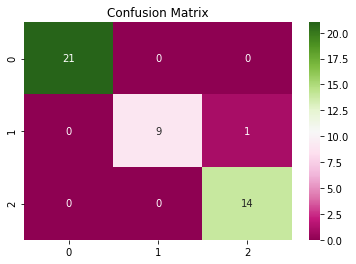

In [65]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [66]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=15)

In [67]:
predictions1 = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [68]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions1))
print('Recall    : ', recall_score(y_test, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


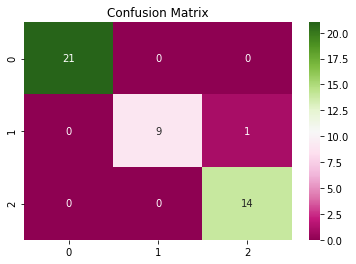

In [69]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [70]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=15)

In [71]:
predictions1 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [72]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions1))
print('Recall    : ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8333333333333334
Recall    :  0.8333333333333334
Precision :  0.8416666666666667
Confusion matrix: 
[[16  0  0]
 [ 0  3  2]
 [ 0  3  6]]


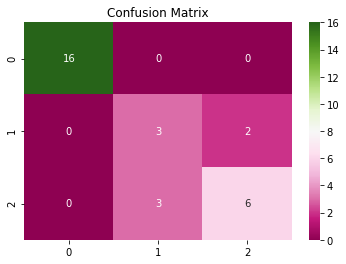

In [73]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [74]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=15)

In [75]:
predictions1 = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [76]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions1))
print('Recall    : ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9333333333333333
Recall    :  0.9333333333333333
Precision :  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


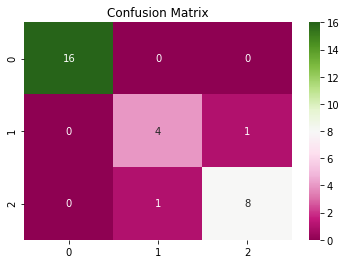

In [77]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [78]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=15)

In [79]:
predictions1 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [80]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions1))
print('Recall    : ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)


Accuracy  :  0.9666666666666667
Recall    :  0.9666666666666667
Precision :  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


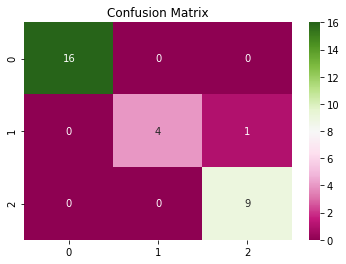

In [81]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

## When K=27
 

In [82]:
model = KNeighborsClassifier(n_neighbors=27) 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [83]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=27)

In [84]:
predictions2 = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [85]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions2))
print('Recall    : ', recall_score(y_test, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8888888888888888
Recall    :  0.8888888888888888
Precision :  0.8915306915306915
Confusion matrix: 
[[21  0  0]
 [ 0  8  2]
 [ 0  3 11]]


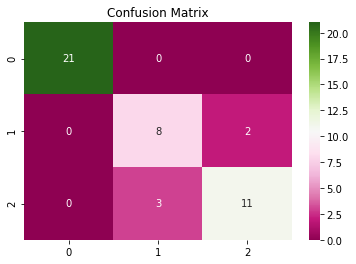

In [86]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [87]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=27)

In [88]:
predictions2 = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [89]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions2))
print('Recall    : ', recall_score(y_test, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


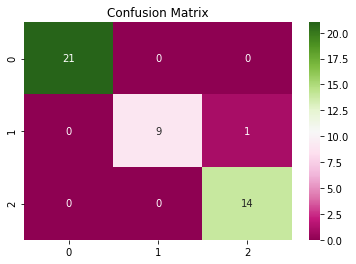

In [90]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [91]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=27)

In [92]:
predictions2 = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [93]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions2))
print('Recall    : ', recall_score(y_test, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


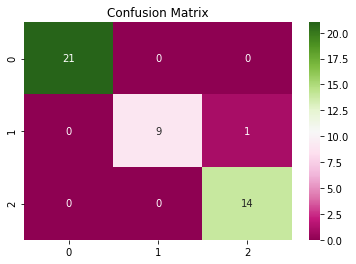

In [94]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [95]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=27)

In [96]:
predictions2 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [97]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions2))
print('Recall    : ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9
Recall    :  0.9
Precision :  0.9069444444444444
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  2  7]]


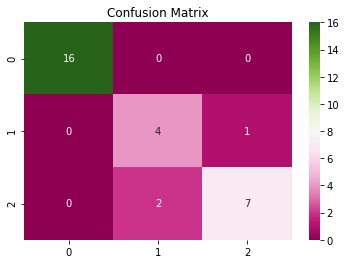

In [98]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [99]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=27)

In [100]:
predictions2 = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [101]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions2))
print('Recall    : ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9333333333333333
Recall    :  0.9333333333333333
Precision :  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


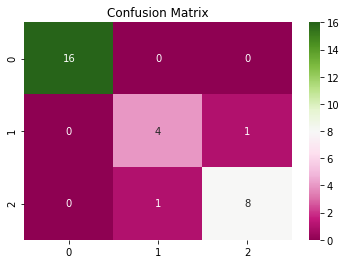

In [102]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [103]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=27)

In [104]:
predictions2 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [105]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions2))
print('Recall    : ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9666666666666667
Recall    :  0.9666666666666667
Precision :  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


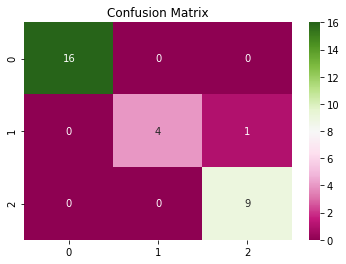

In [106]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

## K=27 is chosen as the optimal K value